Goal: Build an agent that writes a tweet for you.

The Writer: drafts a tweet based on a topic.

The Critic: checks if it is too long (> 280 chars) or "boring".

The Loop: If bad, send it back to the Writer.

The Gatekeeper (HiTL): If the Critic approves, PAUSE. Wait for your manual approval before "posting" (printing) it.

In [2]:
import operator
from typing import Annotated, TypedDict, List, Union, Dict, Any
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver


In [3]:
#define state

class TweetState(TypedDict):
    topic: str
    draft: str | None =  None
    critique: str | None = None
    revision_count: int = 0



In [4]:
#define nodes

def generate_tweet(state: TweetState) -> Dict[str, Any]:
    print("Writer: Genrating Draft")
    topic = state['topic']
    count = state['revision_count']

    #mock logic 
    if count == 0:
        draft = f"Draft for topic: {topic}"
    else:
        draft = f"Draft for topic: {topic} (Revision {count})"
    return {
        "draft": draft,
        "revision_count": count +1
    }


def critique_tweet(state: TweetState) -> Dict[str, Any]:
    print("Critique: Reviewing Draft")
    draft = state['draft']
    if len(draft)>100:
        critique = "Too Long"
    else:
        critique = "Acceptable"
        
    return {"critique": critique}

def publish_tweet(state: TweetState) -> Dict[str, Any]:
    print("Publisher: Publishing Tweet")
    draft = state['draft']
    return {"published_tweet": draft}

In [5]:
#build graph
builder = StateGraph(TweetState)
#define node
builder.add_node("writer", generate_tweet)
builder.add_node("critique", critique_tweet)
builder.add_node("publisher", publish_tweet)

#add edge
builder.add_edge(START, "writer")
builder.add_edge("writer", "critique")

#add conditional logic
def decide_next_step(state: TweetState):
    if state['revision_count'] == 3:
        print(f'Maximum revision count reached: {state["revision_count"]}')
        return "publisher"
    if state['critique'] == "Acceptable":
        return "publisher"
    else:
        return "writer"

builder.add_conditional_edges("critique", decide_next_step, {
    "publisher": "publisher",
    "writer": "writer"
})


#memory store
memory = MemorySaver()

#compile
app = builder.compile(checkpointer=memory,
interrupt_before = ['publisher'])


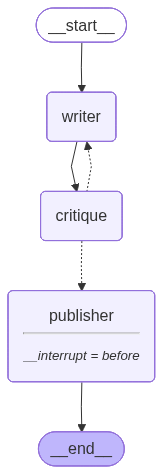

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))   

In [7]:

thread = {
    "configurable":{
        "thread_id" : "tweet_test_1",
    }
}
msg = TweetState({"topic": "Langraph Langraph Langraph Langraphraph L", 
"revision_count":0})
for event in app.stream(msg, thread):
    print(event)
    pass
print("Pause for human")
current_state = app.get_state(thread)
print(f'Pending state: {current_state}')
user_input = input("Type 'ok' to publish: ")

if user_input == "ok":
    for event in app.stream(msg, thread):
        print(event)
    

Writer: Genrating Draft
{'writer': {'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph L', 'revision_count': 1}}
Critique: Reviewing Draft
{'critique': {'critique': 'Acceptable'}}
{'__interrupt__': ()}
Pause for human
Pending state: StateSnapshot(values={'topic': 'Langraph Langraph Langraph Langraphraph L', 'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph L', 'critique': 'Acceptable', 'revision_count': 1}, next=('publisher',), config={'configurable': {'thread_id': 'tweet_test_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3f8d-cfc6-6bd2-8002-4975fdf47164'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-28T14:24:04.741006+00:00', parent_config={'configurable': {'thread_id': 'tweet_test_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3f8d-cfc5-644e-8001-971e8ff978ca'}}, tasks=(PregelTask(id='6e3d10e5-25fa-b560-08ef-e8b5fe251817', name='publisher', path=('__pregel_pull', 'publisher'), error=None, interrupts=(), state=None, res

In [9]:
#define nodes
#define state
import operator
from typing import Annotated, TypedDict, List, Union, Dict, Any
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

class TweetState(TypedDict):
    topic: str
    draft: str | None =  None
    critique: str | None = None
    revision_count: int = 0


def generate_tweet(state: TweetState) -> Dict[str, Any]:
    print("Writer: Genrating Draft")
    topic = state['topic']
    count = state['revision_count']

    #mock logic 
    if count == 0:
        draft = f"Draft for topic: {topic}"
    else:
        draft = f"Draft for topic: {topic} (Revision {count})"
    return {
        "draft": draft,
        "revision_count": count +1
    }


def critique_tweet(state: TweetState) -> Dict[str, Any]:
    print("Critique: Reviewing Draft")
    draft = state['draft']
    if len(draft)>100:
        critique = "Too Long"
    else:
        critique = "Acceptable"
        
    return {"critique": critique}

def publish_tweet(state: TweetState) -> Dict[str, Any]:
    print("Publisher: Publishing Tweet")
    draft = state['draft']
    return {"published_tweet": draft}#build graph
builder = StateGraph(TweetState)
#define node
builder.add_node("writer", generate_tweet)
builder.add_node("critique", critique_tweet)
builder.add_node("publisher", publish_tweet)

#add edge
builder.add_edge(START, "writer")
builder.add_edge("writer", "critique")

#add conditional logic
def decide_next_step(state: TweetState):
    if state['revision_count'] == 3:
        print(f'Maximum revision count reached: {state["revision_count"]}')
        return "publisher"
    if state['critique'] == "Acceptable":
        return "publisher"
    else:
        return "writer"

builder.add_conditional_edges("critique", decide_next_step, {
    "publisher": "publisher",
    "writer": "writer"
})


#memory store
memory = MemorySaver()

#compile
app = builder.compile(checkpointer=memory,
interrupt_before = ['publisher'])

thread = {
    "configurable":{
        "thread_id" : "tweet_test_1",
    }
}
msg = TweetState({"topic": "Langraph Langraph Langraph Langraphraph L", 
"revision_count":0})
for event in app.stream(msg, thread):
    print(event)
    pass
print("Pause for human")
current_state = app.get_state(thread)
print(f'Pending state: {current_state}')
if current_state['revision_count'] == 3:
    user_input = input("Maximum retry reached Type 'ok' to publish/review: ")
else:
    user_input = input("Type 'ok' to publish: ")
if user_input == "ok":
    for event in app.stream(None, thread):
        print(event)
    

Writer: Genrating Draft
{'writer': {'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph L', 'revision_count': 1}}
Critique: Reviewing Draft
{'critique': {'critique': 'Acceptable'}}
{'__interrupt__': ()}
Pause for human
Pending state: StateSnapshot(values={'topic': 'Langraph Langraph Langraph Langraphraph L', 'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph L', 'critique': 'Acceptable', 'revision_count': 1}, next=('publisher',), config={'configurable': {'thread_id': 'tweet_test_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3f90-577e-6604-8002-99c83e74b24a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-28T14:25:12.659092+00:00', parent_config={'configurable': {'thread_id': 'tweet_test_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3f90-577c-6a0c-8001-e16953388751'}}, tasks=(PregelTask(id='3168415b-d45e-2cfd-c303-877f463220b5', name='publisher', path=('__pregel_pull', 'publisher'), error=None, interrupts=(), state=None, res

TypeError: tuple indices must be integers or slices, not str

In [10]:
#reject with max
thread = {
    "configurable":{
        "thread_id" : "tweet_test_1",
    }
}
msg = TweetState({"topic": "Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL", 
"revision_count":0})
for event in app.stream(msg, thread):
    print(event)
    pass
print("Pause for human")
current_state = app.get_state(thread)
print(f'Pending state: {current_state}')
user_input = input("Type 'ok' to publish: ")

if user_input == "ok":
    for event in app.stream(None, thread):
        print(event)

Writer: Genrating Draft
{'writer': {'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL', 'revision_count': 1}}
Critique: Reviewing Draft
{'critique': {'critique': 'Too Long'}}
Writer: Genrating Draft
{'writer': {'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL (Revision 1)', 'revision_count': 2}}
Critique: Reviewing Draft
{'critique': {'critique': 'Too Long'}}
Writer: Genrating Draft
{'writer': {'draft': 'Draft for topic: Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL Langraph Langraph Langraph Langraphraph Langraph Langraph Langraph Langraphraph LL (Revision 2)', 'revision_count': 3}}
Critique: Reviewing Draft
Maximum revision count reached: 3
{'critique': {'critique':

NameError: name 'app' is not defined